### <center> Практическая работа №2.
    
### <center> Численное дифференцирование. 

### <center> Гавриков Арсений, группа НФ-301.
    
### <center> Вариант №4.

**Цель работы**: Численный поиск второй производной и сравнение аналитического и численного решения. 

В данной работа будут рассмотрено: Численное дифференцирование, а также визуализация данной функции и ее второй производной.

In [10]:
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np

import sympy as sp
x = sp.Symbol('x')

import seaborn as sns
sns.set()

from pylab import rcParams
rcParams['figure.figsize'] = 12,8

from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import warnings
warnings.simplefilter('ignore')

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%pylab inline

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


**Задание:** Получить график функции $y = sin(2x)$. Найти численно вторую производную этой функции. Сравнить полученный результат с аналитическим решением.

**Изобразим на графике функцию $y = sin(2x)$.**

Text(7.5,0.9,'Монотонно убывает')

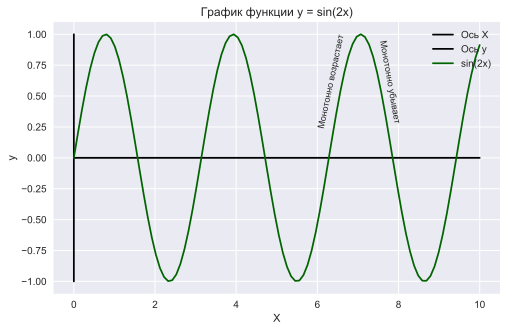

In [11]:
f = lambda X: np.sin(2*X)

x_lab = np.linspace(0, 10, 100)
y_lab = np.linspace(-1, 1, 20)

plt.figure(figsize=(8,5))

plt.plot(x_lab, [0]*len(x_lab),  color='black')
plt.plot([0]*len(y_lab), y_lab, color='black')
plt.plot(x_lab, f(x_lab),  color='darkgreen')

plt.xlabel('X')
plt.ylabel('y')
plt.title('График функции y = sin(2x)')

plt.legend(['Ось X', 'Ось y', 'sin(2x)'], loc=1)

plt.text(6.0, 0.95, 'Монотонно возрастает', fontsize=9, rotation=78)
plt.text(7.5, 0.9, 'Монотонно убывает', fontsize=9, rotation=280)

Изобразим этот же график с помощью библиотеке plotly для получения более аккуратной и интерактивной визуализации.

In [12]:
f_lab = f(x_lab)

In [13]:
trace1 = go.Line(x=x_lab, y=f_lab, mode="lines", marker={'color': 'black'})
                                               
data=[trace1]
layout=go.Layout(title="График функции y = sin(2x)", xaxis={'title':'Ось X'}, yaxis={'title':'Ось y'})
figure=go.Figure(data=data, layout=layout)

iplot(figure, show_link=False)

Для поиска второй производной будем использовать формулу: $$ f_{x}^{''} = \frac{f_{j+1} - 2f_{j} + f_{j-1}}{\Delta^{2}}$$ где $${\Delta} = x_{j+1} - x_{j}$$

Напишем две функции: первая double_derivative() будет численным методом написанным выше считать вторую производную, вторая же функция N_derivative() будет искать реальную производную N-ого порядка от заданной фунции.

In [14]:
def double_derivative(func, a, b, delta=0.01):
    """
    Принимает на вход функцию, а также 
    пределы, в которых будет происходить дифф-ие, и шаг delta.
    На выходе функция возвращает список (list) значений второй
    производной данной функции на данном интервале (a,b).
    """
    
    double_deriv = []
    while a <= b:
        double_deriv.append((func(a + delta) - 2*func(a) + func(a - delta))/delta**2)
        a += delta
    return double_deriv

def N_derivative(func, N):
    """
    Принимает на вход функцию и порядок дифф-ния, 
    возвращает N-ую производную принятой функции.
    """
    deriv = func
    for n in range(0, N):
        deriv = sp.Derivative(deriv, x).doit()
    return print('Производная {}-ого порядка от функции {} равна {}'.format(N, func, deriv)), deriv

Получим точную вторую производную от функции $sin(2x)$.

In [15]:
N_derivative(sp.sin(2*x), 2)[0]

Производная 2-ого порядка от функции sin(2*x) равна -4*sin(2*x)


In [16]:
real_derivative = lambda X: -4*np.sin(2*X)

Теперь изобразим на графике реальную вторую производную функции $sin(2x)$ и полученную численным методом.

In [17]:
y1 = double_derivative(f, -2*np.pi, 2*np.pi, delta=0.3)
x1 = np.linspace(-2*np.pi, 2*np.pi, len(y1))

y0 = double_derivative(f, -2*np.pi, 2*np.pi, delta=0.001)
x0 = np.linspace(-2*np.pi, 2*np.pi, len(y0))

x2 = np.linspace(-2*np.pi, 2*np.pi, 1000)
y2 = real_derivative(x2)

In [18]:
trace0 = go.Line(x=x0, y=y0, mode="lines", name='Чис. метод при delta=0.001', line=dict(width = 3), marker={'color': 'red'})

trace1 = go.Line(x=x1, y=y1, mode="lines", name='Чис. метод при delta=0.3',  marker={'color': 'blue'})

trace2 = go.Line(x=x2, y=y2, mode="lines", name='Реальная производная', line=dict(width = 2), marker={'color': 'black'})
                                               
data=[trace0, trace1, trace2]
layout=go.Layout(title="График функции y = -4sin(2x)", xaxis={'title':'Ось X'}, yaxis={'title':'Ось y'})
figure=go.Figure(data=data, layout=layout)

iplot(figure, show_link=False)

### Вывод:
**Видно, что при достаточной точности производная полученная численным методом и реальная производная совпадают.**

In [19]:
! jupyter nbconvert --to html Chisl2.ipynb

[NbConvertApp] Converting notebook Chisl2.ipynb to html
[NbConvertApp] Writing 904602 bytes to Chisl2.html
